# II-2 Analyse Uni-variable
**But:** analyser chaque variable séparément pour comprendre sa distribution, ses statistiques descriptives (moyenne, médiane, écart-type) et détecter les valeurs aberrantes.

In [1]:
# Importer les bibliothèques nécessaires

import pandas as pd          # Manipulation des données
import numpy as np           # Calculs numériques
import matplotlib.pyplot as plt  # Visualisation simple
import seaborn as sns            # Visualisation avancée
import scipy.stats as stats       # Pour QQPlot et tests statistiques
from scipy.stats import norm, probplot

# Charger le dataset
data_path = "../../data/raw/diabetes.csv"  # Chemin relatif depuis le notebook
df = pd.read_csv(data_path)

# Afficher les 5 premières lignes pour vérifier le chargement
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Mesures statistiques de base
stats_df = df.describe()  # Fournit count, mean, std, min, 25%, 50%, 75%, max
print(stats_df)

# Ajouter les valeurs manquantes (NaN) si elles existent
missing_values = df.isnull().sum()
print("Valeurs manquantes par variable :\n", missing_values)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Analyse de la variable : Pregnancies


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

Asymétrie (skewness) : 0.902
→ Distribution asymétrique à droite.


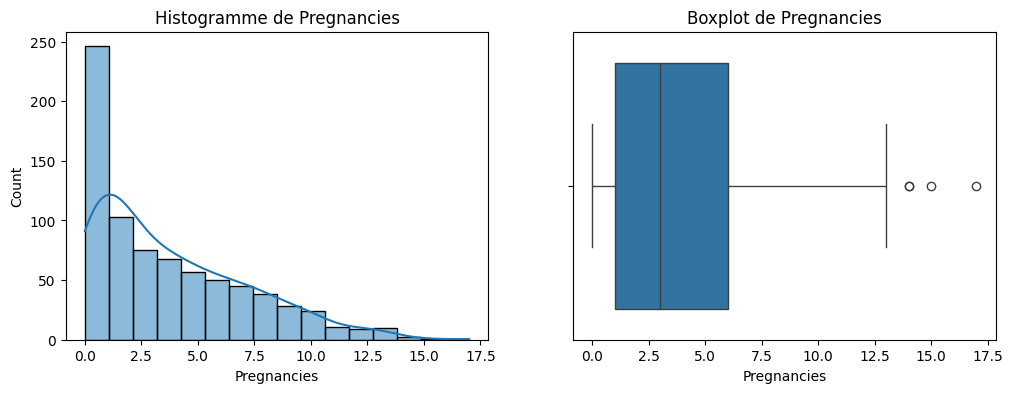

Analyse de la variable : Glucose


count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Asymétrie (skewness) : 0.174
→ Distribution asymétrique à droite.


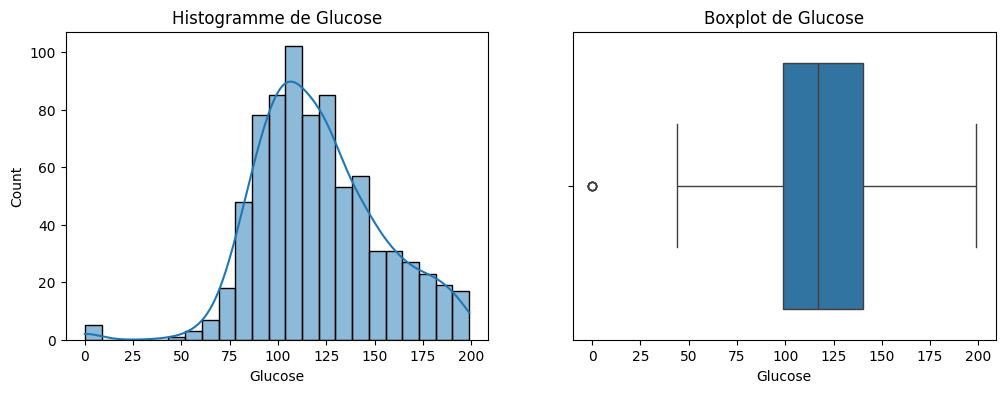

Analyse de la variable : BloodPressure


count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Asymétrie (skewness) : -1.844
→ Distribution asymétrique à gauche.


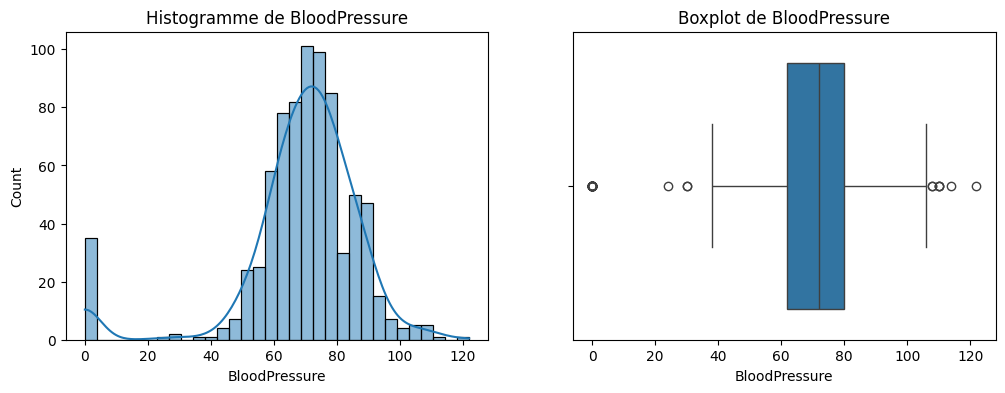

Analyse de la variable : SkinThickness


count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Asymétrie (skewness) : 0.109
→ Distribution asymétrique à droite.


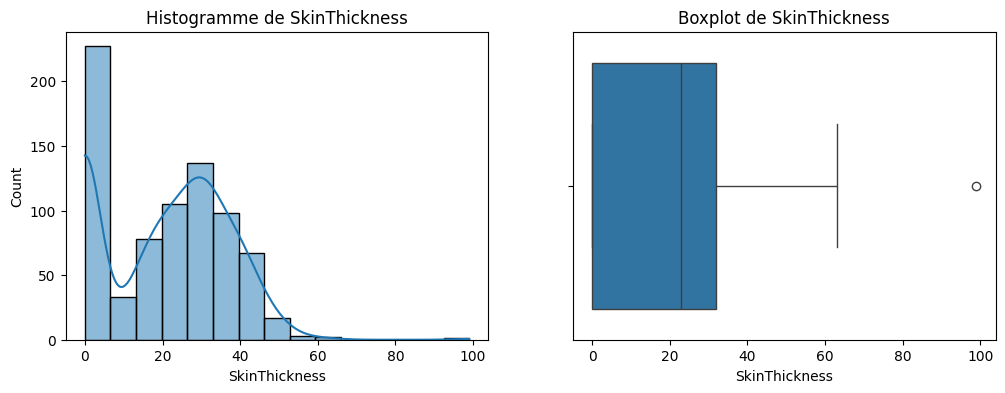

Analyse de la variable : Insulin


count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

Asymétrie (skewness) : 2.272
→ Distribution asymétrique à droite.


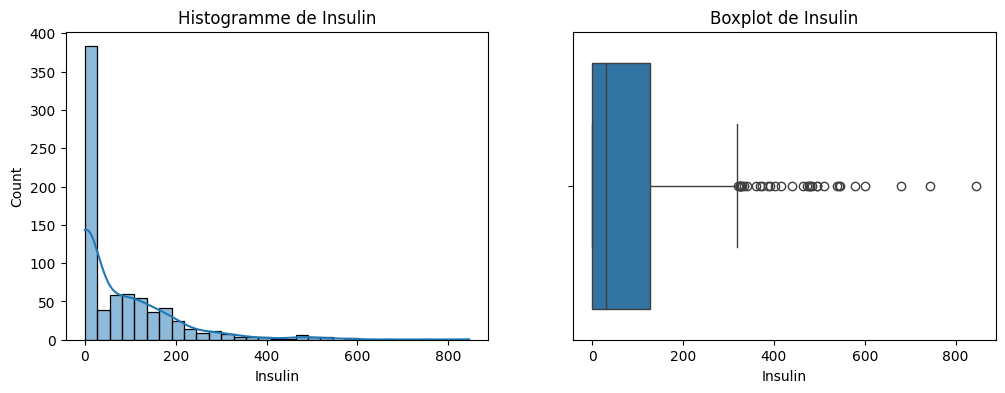

Analyse de la variable : BMI


count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

Asymétrie (skewness) : -0.429
→ Distribution asymétrique à gauche.


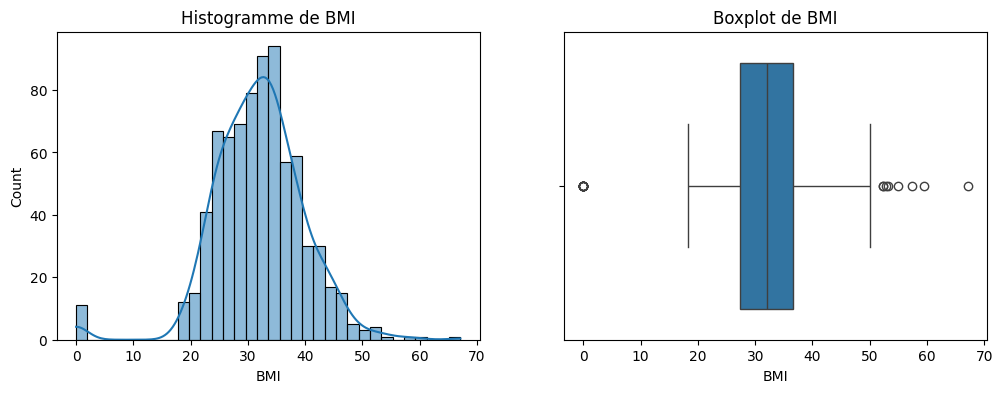

Analyse de la variable : DiabetesPedigreeFunction


count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

Asymétrie (skewness) : 1.920
→ Distribution asymétrique à droite.


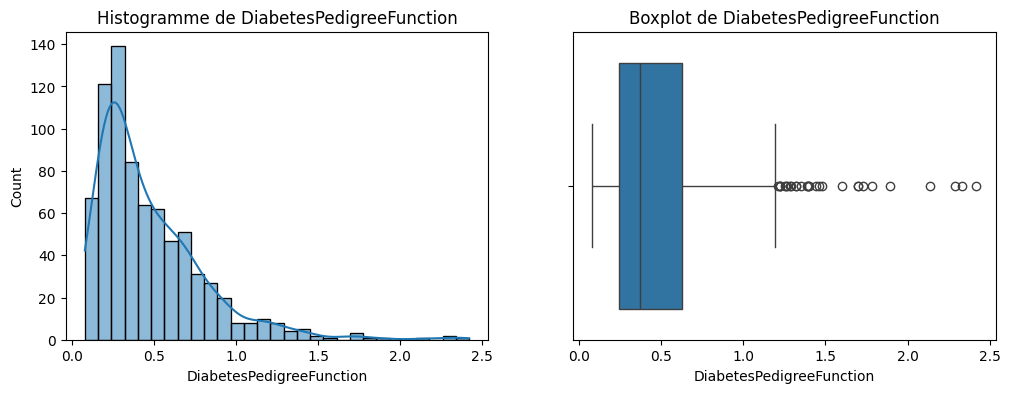

Analyse de la variable : Age


count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

Asymétrie (skewness) : 1.130
→ Distribution asymétrique à droite.


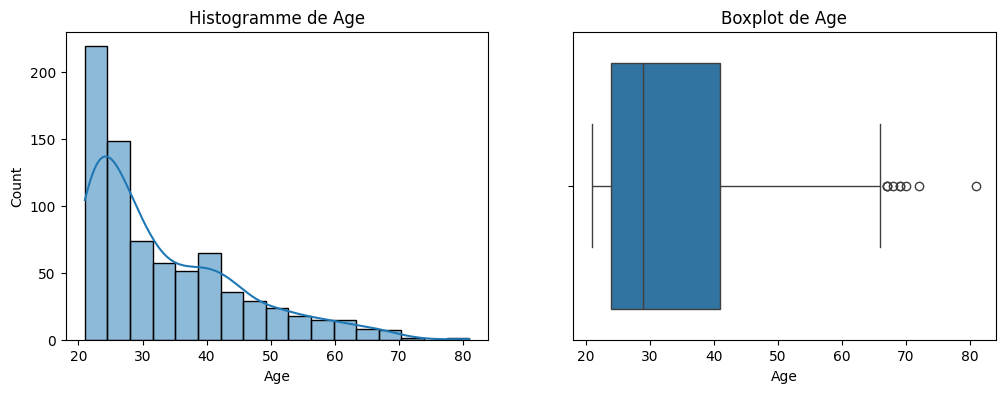

Analyse de la variable : Outcome


count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

Asymétrie (skewness) : 0.635
→ Distribution asymétrique à droite.


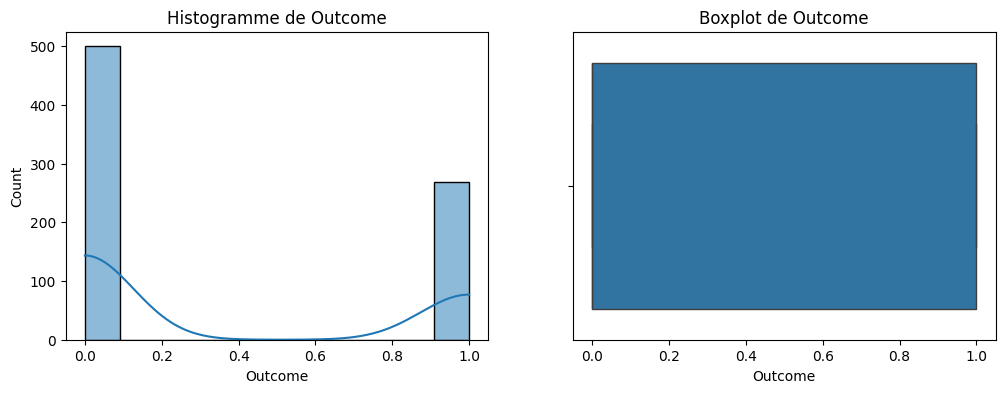

In [3]:
#Interprétation :

# Parcourir toutes les variables numériques
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    print("="*60)
    print(f"Analyse de la variable : {col}")
    print("="*60)

    # ---- Mesures statistiques ----
    display(df[col].describe())

    # ---- Coefficient d'asymétrie (skewness) ----
    skew_val = df[col].skew()
    print(f"Asymétrie (skewness) : {skew_val:.3f}")

    if skew_val > 0:
        print("→ Distribution asymétrique à droite.")
    elif skew_val < 0:
        print("→ Distribution asymétrique à gauche.")
    else:
        print("→ Distribution symétrique.")

    # ---- Histogramme ----
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogramme de {col}")

    # ---- Boxplot ----
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")

    plt.show()


In [4]:
# Liste des colonnes à corriger
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacer les 0 par la médiane de chaque colonne
for col in cols_with_zero:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

# Vérification
print(df[cols_with_zero].head(10))

   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148             72             35     30.5  33.6
1       85             66             29     30.5  26.6
2      183             64             23     30.5  23.3
3       89             66             23     94.0  28.1
4      137             40             35    168.0  43.1
5      116             74             23     30.5  25.6
6       78             50             32     88.0  31.0
7      115             72             23     30.5  35.3
8      197             70             45    543.0  30.5
9      125             96             23     30.5  32.0


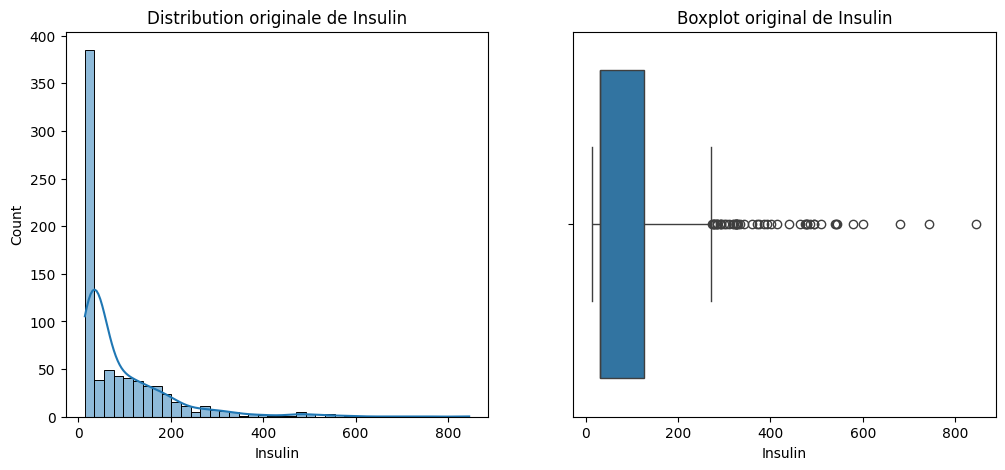

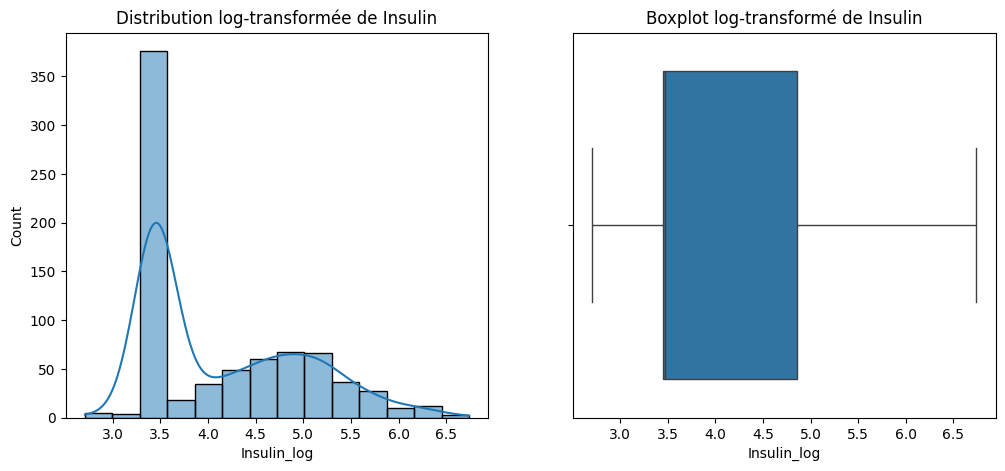

In [5]:
#Gestion des valeurs aberrantes pour la variable 'Insulin'(Technique de transformation logarithmique)

# Visualisation avant transformation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Insulin'], kde=True)
plt.title('Distribution originale de Insulin')

plt.subplot(1,2,2)
sns.boxplot(x=df['Insulin'])
plt.title('Boxplot original de Insulin')
plt.show()

# Transformation log pour Insulin
df['Insulin_log'] = np.log1p(df['Insulin'])

# Visualisation après transformation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Insulin_log'], kde=True)
plt.title('Distribution log-transformée de Insulin')

plt.subplot(1,2,2)
sns.boxplot(x=df['Insulin_log'])
plt.title('Boxplot log-transformé de Insulin')
plt.show()


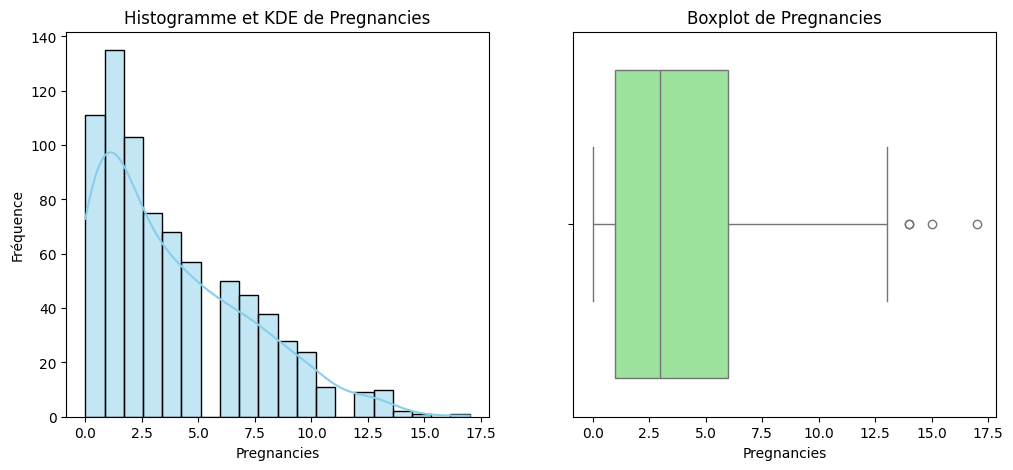

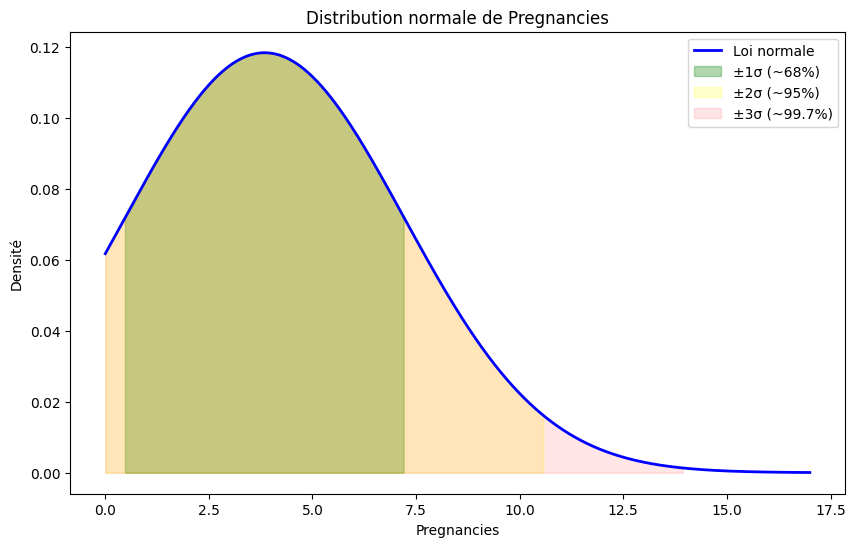

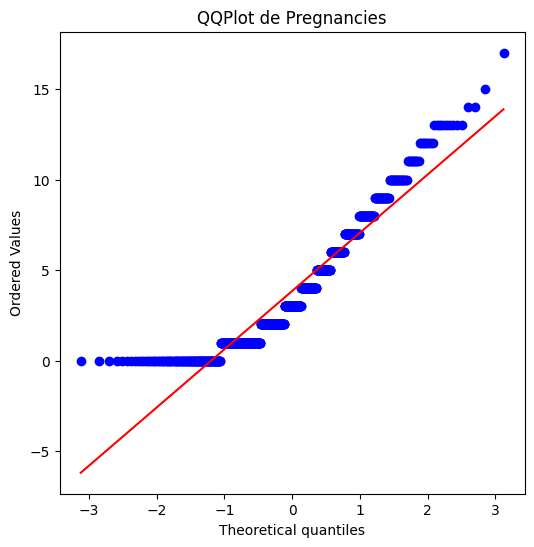

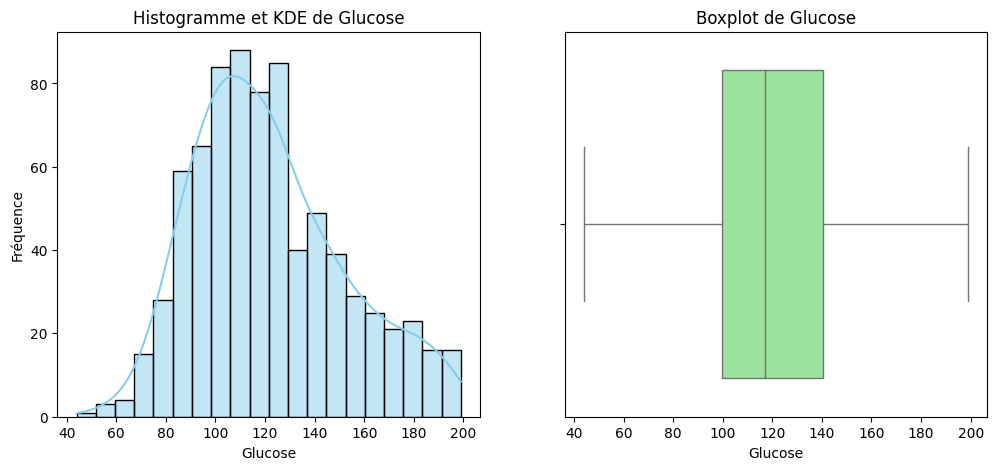

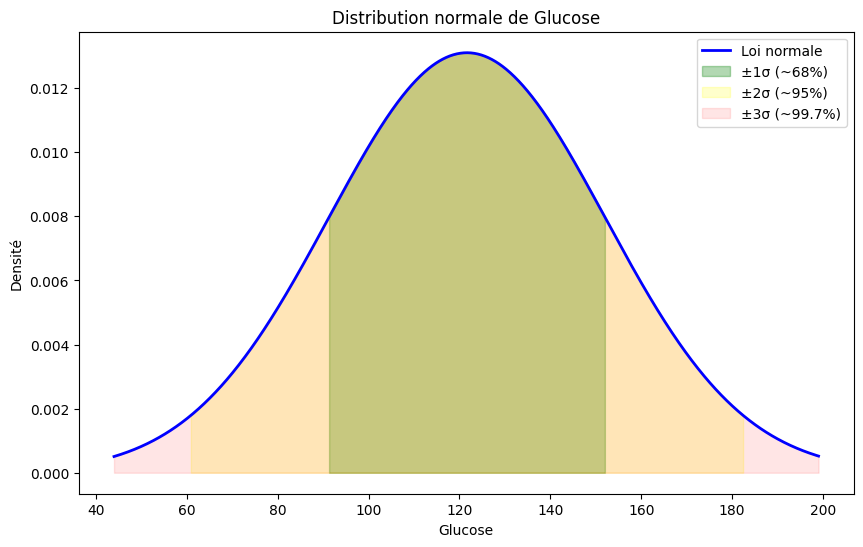

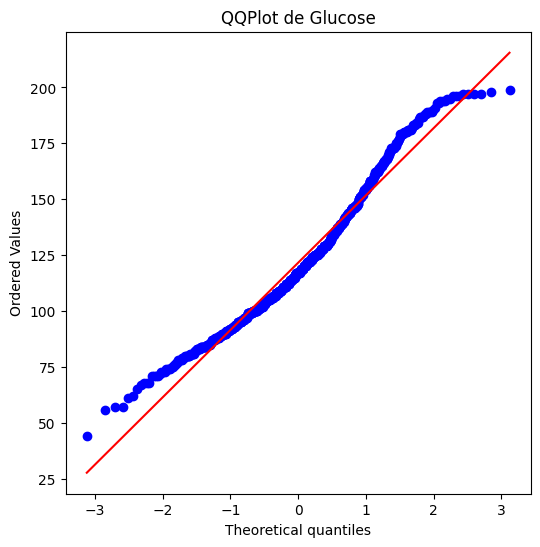

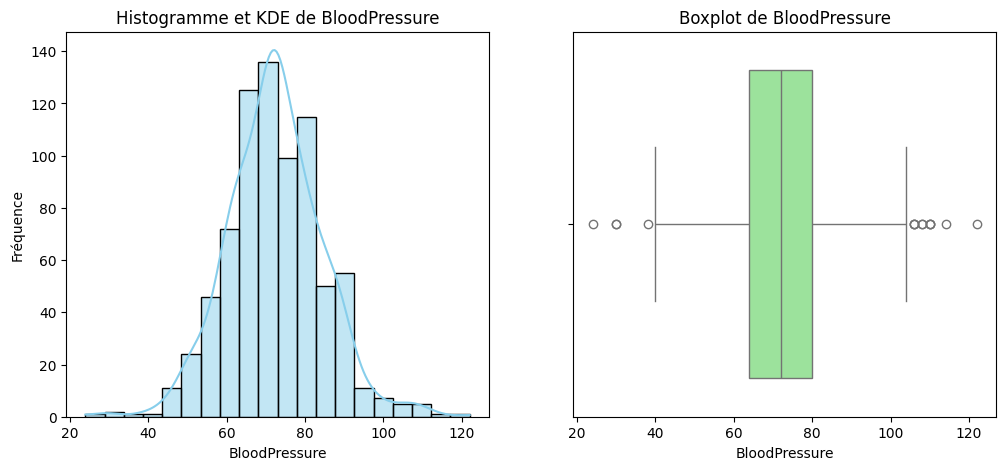

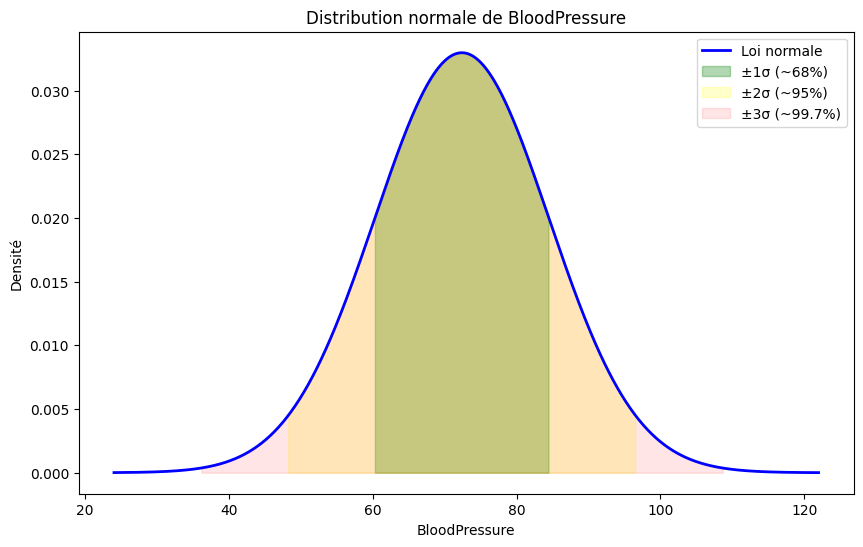

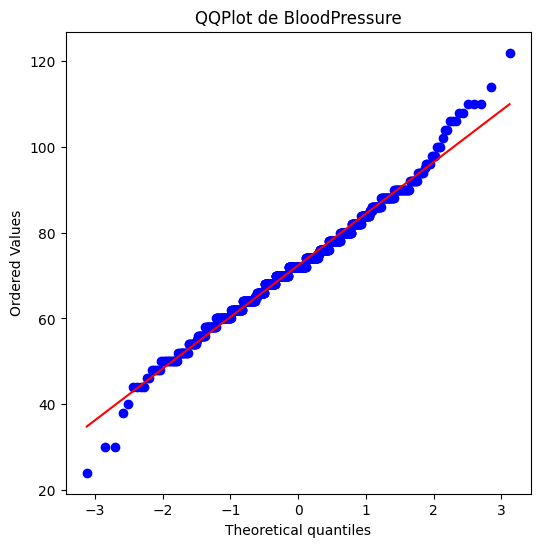

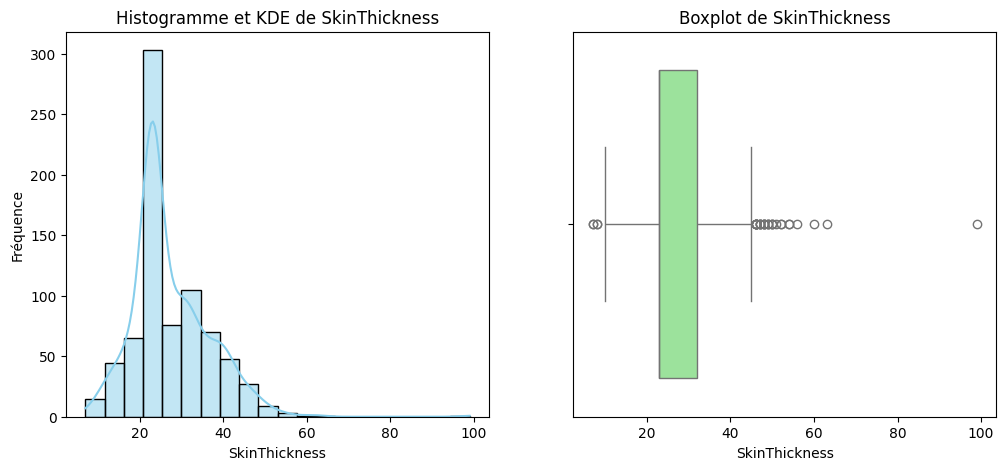

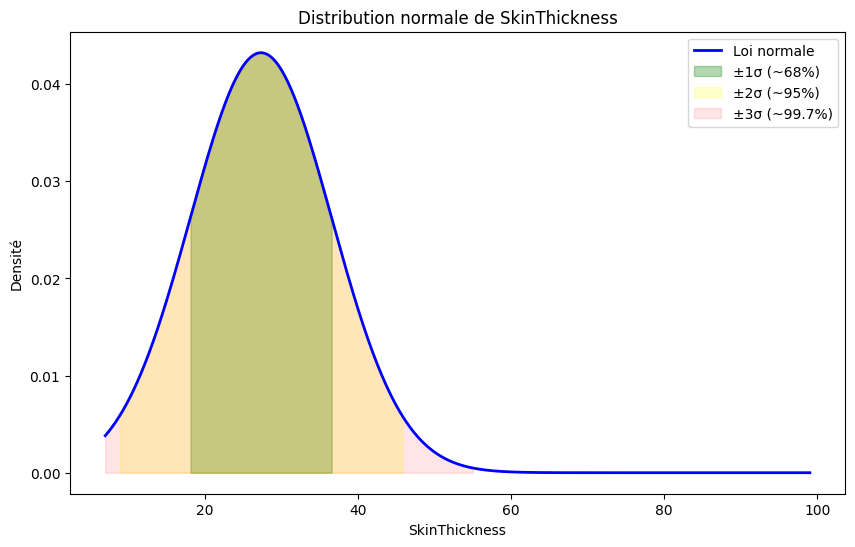

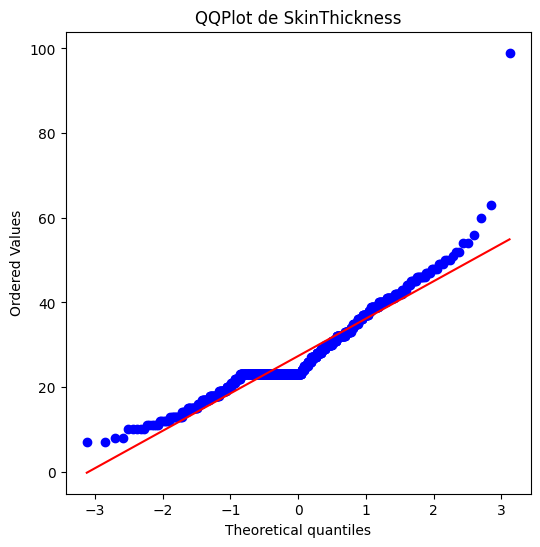

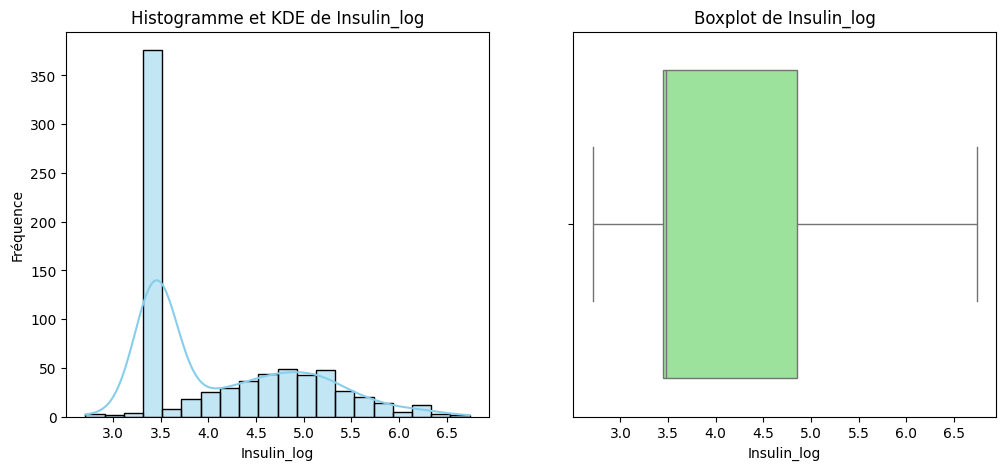

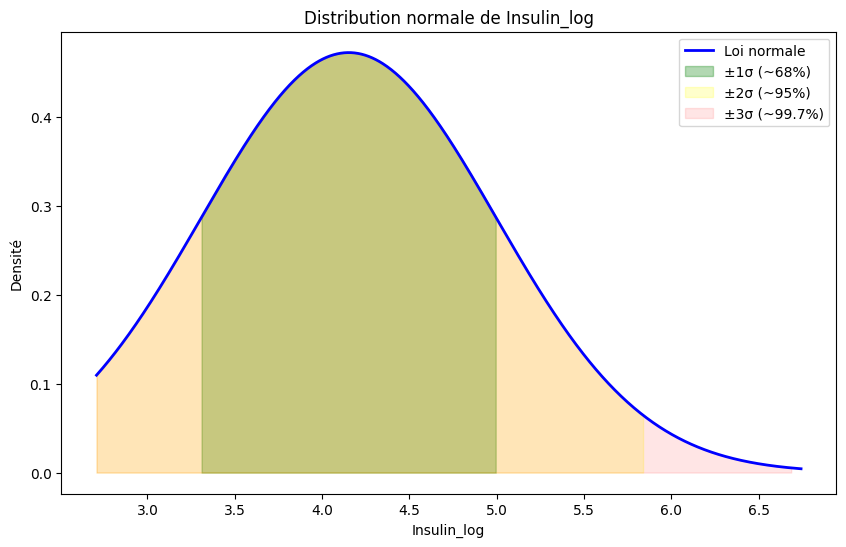

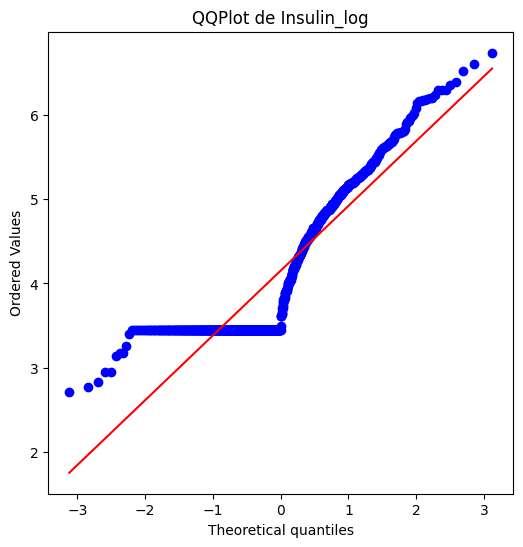

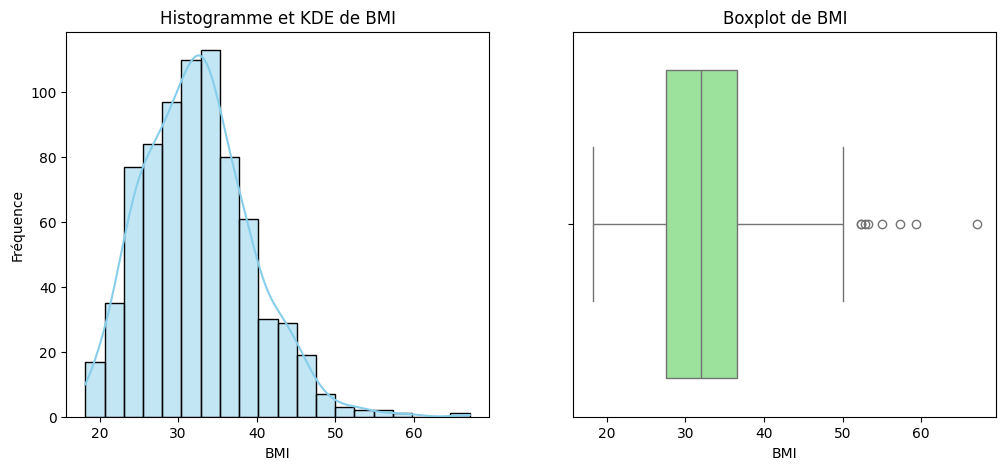

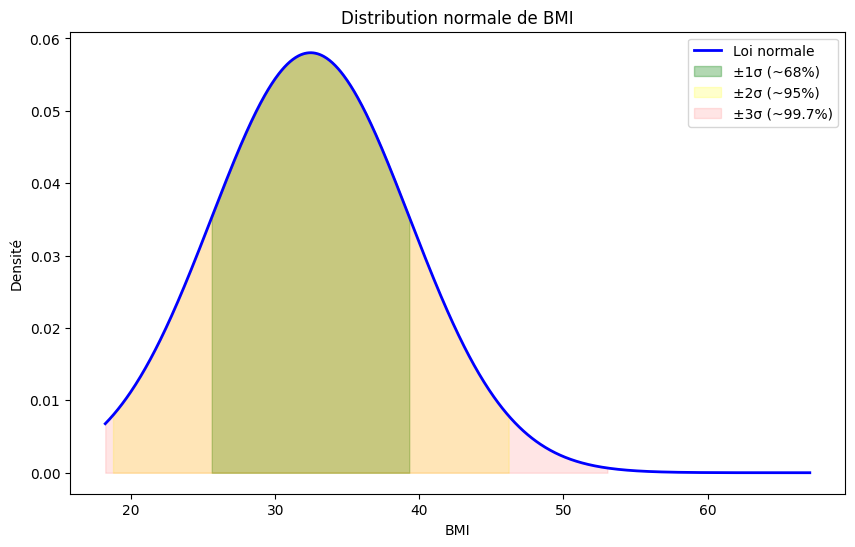

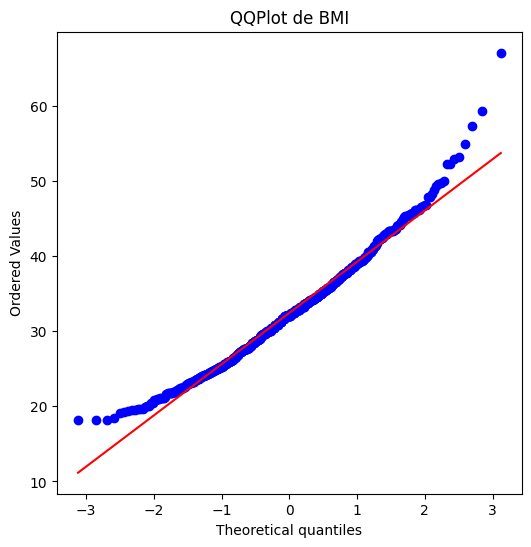

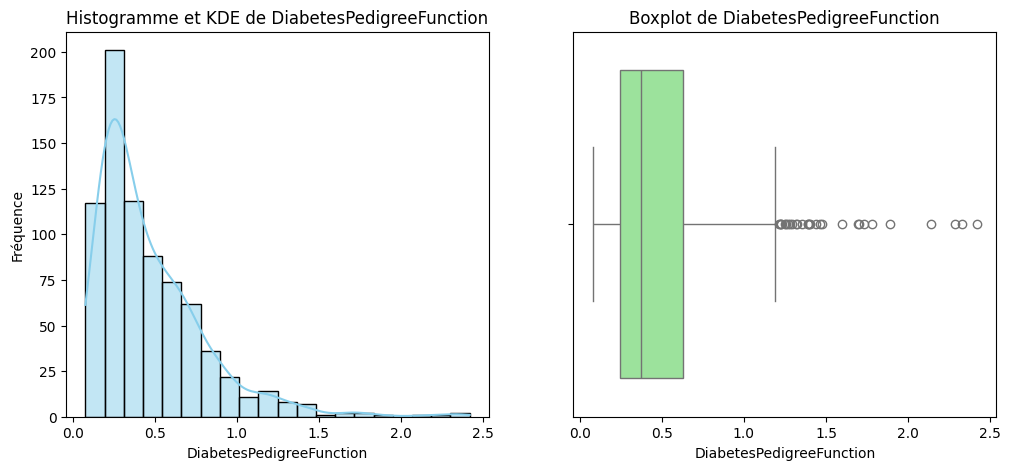

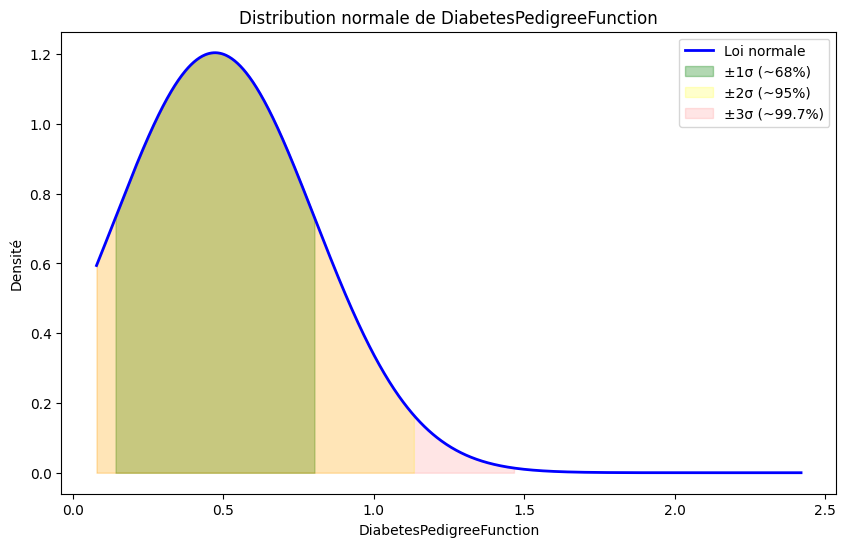

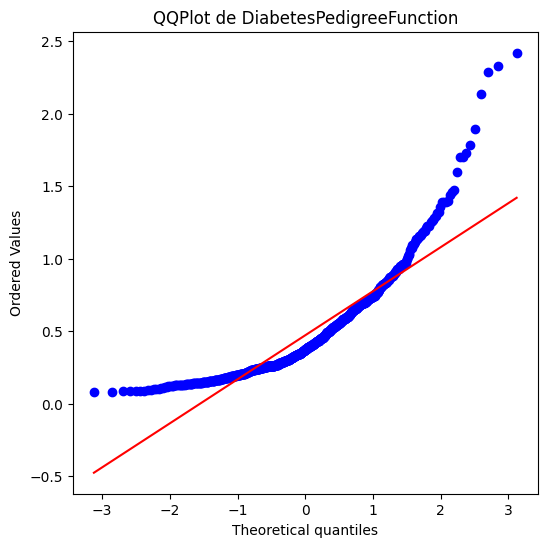

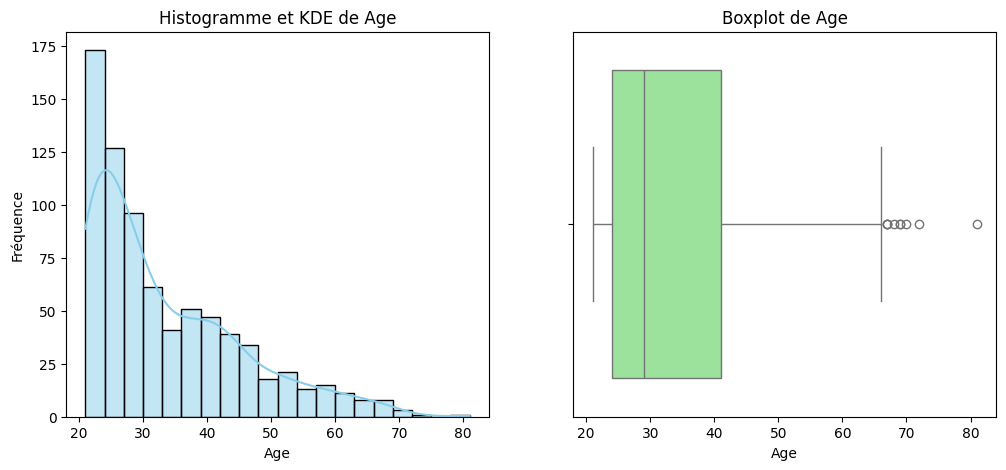

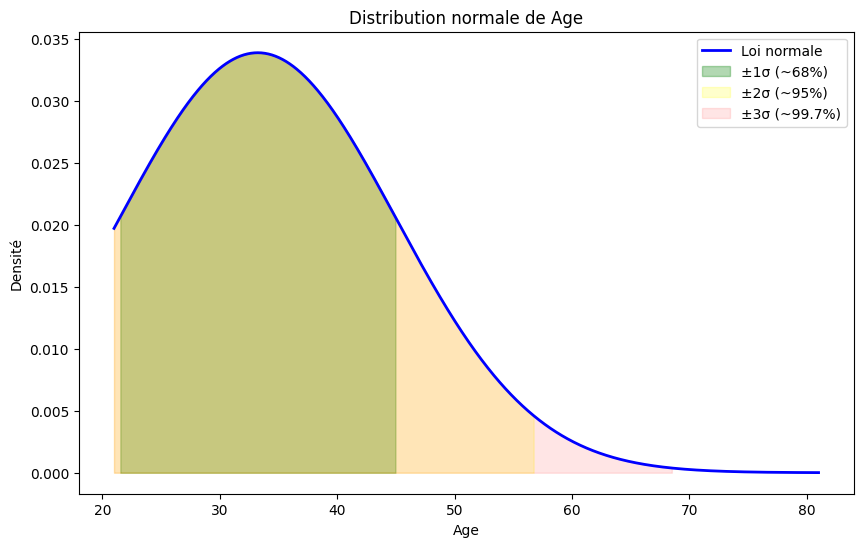

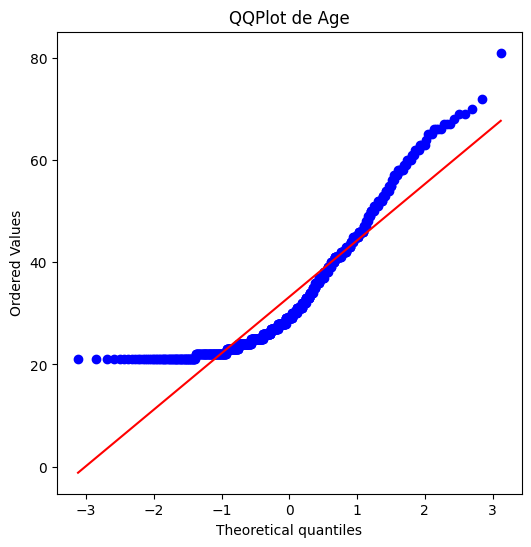

In [6]:
# ===============================
#Visualisation univariée 
# ===============================



# Liste des variables numériques à analyser
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_log', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Boucle sur chaque variable
for col in numeric_cols:
    
    # =======================
    # - Visualisation des valeurs
    # =======================
    plt.figure(figsize=(12,5))
    
    #Graphes des valeurs

    # Histogramme + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogramme et KDE de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    
    plt.show()
    
    # =======================
    # - Distribution des fréquences avec la loi normale
    # =======================
    data = df[col]
    mu = data.mean()
    sigma = data.std()
    
    x = np.linspace(data.min(), data.max(), 1000)
    y = norm.pdf(x, mu, sigma)
    
    plt.figure(figsize=(10,6))
    plt.plot(x, y, color='blue', lw=2, label='Loi normale')
    
    # Zones ±1σ, ±2σ, ±3σ
    plt.fill_between(x, 0, y, where=(x>mu-sigma) & (x<mu+sigma), color='green', alpha=0.3, label='±1σ (~68%)')
    plt.fill_between(x, 0, y, where=(x>mu-2*sigma) & (x<mu+2*sigma), color='yellow', alpha=0.2, label='±2σ (~95%)')
    plt.fill_between(x, 0, y, where=(x>mu-3*sigma) & (x<mu+3*sigma), color='red', alpha=0.1, label='±3σ (~99.7%)')
    
    plt.title(f'Distribution normale de {col}')
    plt.xlabel(col)
    plt.ylabel('Densité')
    plt.legend()
    plt.show()
    
    # =======================
    # - QQPlot pour vérifier la normalité
    # =======================
    plt.figure(figsize=(6,6))
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQPlot de {col}')
    plt.show()
